In [257]:
from pandas_datareader import data as wb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from datetime import date
import datetime
from scipy.stats import norm

In [258]:
end_date = str(date.today() - datetime.timedelta(days=1))
ini_date = date(2017,1,1)
idx = pd.date_range(ini_date, end_date)
print(ini_date,'-',end_date)

2017-01-01 - 2021-03-29


In [259]:
tickers = {'BTC-USD':None,
           'ETH-USD':None,
           'BNB-USD':None,
           'ADA-USD':None,
           '^GSPC':None}

for ticker in tickers.keys():
    df = wb.DataReader(ticker, data_source='yahoo', end=end_date)
    if ini_date<df.index[0]:
        ini_date=df.index[0]
    print(df[df.index.duplicated()])
    df = df.groupby(['Date']).mean()
    tickers[ticker] = df.reindex(idx).fillna(method='ffill')

                    High           Low          Open         Close  \
Date                                                                 
2017-03-26   1046.400024    971.984009    972.054993   1045.770020   
2018-03-25   8530.080078   7921.430176   8498.469727   8209.400391   
2019-03-31   4164.953125   4096.901367   4105.362305   4158.183105   
2020-03-29   6250.467285   5920.085938   6245.624512   5922.042969   
2021-03-28  58342.097656  55139.339844  55947.898438  57750.199219   

                  Volume     Adj Close  
Date                                    
2017-03-26  3.725350e+08   1045.770020  
2018-03-25  5.921040e+09   8209.400391  
2019-03-31  1.015779e+10   4158.183105  
2020-03-29  2.837369e+10   5922.042969  
2021-03-28  5.762559e+10  57750.199219  
                   High          Low         Open        Close        Volume  \
Date                                                                           
2017-03-26    52.460899    48.929798    51.312099    49.666901

In [129]:
for ticker,df in tickers.items():
    print('\n','-'*45,ticker,'-'*45)
    df.info()


 --------------------------------------------- BTC-USD ---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1545 entries, 2017-01-01 to 2021-03-25
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1545 non-null   float64
 1   Low        1545 non-null   float64
 2   Open       1545 non-null   float64
 3   Close      1545 non-null   float64
 4   Volume     1545 non-null   float64
 5   Adj Close  1545 non-null   float64
dtypes: float64(6)
memory usage: 84.5 KB

 --------------------------------------------- ETH-USD ---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1545 entries, 2017-01-01 to 2021-03-25
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1545 non-null   float64
 1   Low        1545 non-null   float64
 2   Open  

In [130]:
for ticker,df in tickers.items():
    df['simple_return'] = (df['Adj Close']/df['Adj Close'].shift(1))-1
    print('\n','-'*45,ticker,'-'*45)
    print(df['simple_return'])


 --------------------------------------------- BTC-USD ---------------------------------------------
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2021-03-21   -0.013551
2021-03-22   -0.052053
2021-03-23    0.003847
2021-03-24   -0.035892
2021-03-25   -0.020277
Freq: D, Name: simple_return, Length: 1545, dtype: float64

 --------------------------------------------- ETH-USD ---------------------------------------------
2017-01-01         NaN
2017-01-02    0.025199
2017-01-03    0.160737
2017-01-04    0.156947
2017-01-05   -0.088627
                ...   
2021-03-21   -0.013471
2021-03-22   -0.054179
2021-03-23   -0.007499
2021-03-24   -0.050777
2021-03-25    0.001221
Freq: D, Name: simple_return, Length: 1545, dtype: float64

 --------------------------------------------- BNB-USD ---------------------------------------------
2017-01-01         NaN
2017-01-02         NaN
2017-01-03         NaN
2


 --------------------------------------------- BTC-USD ---------------------------------------------


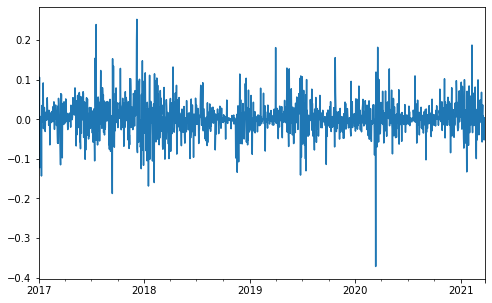


 --------------------------------------------- ETH-USD ---------------------------------------------


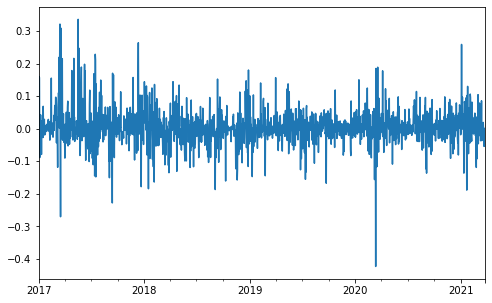


 --------------------------------------------- BNB-USD ---------------------------------------------


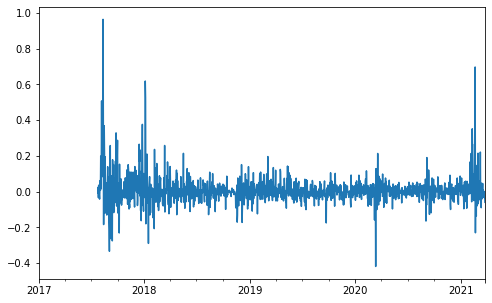


 --------------------------------------------- ADA-USD ---------------------------------------------


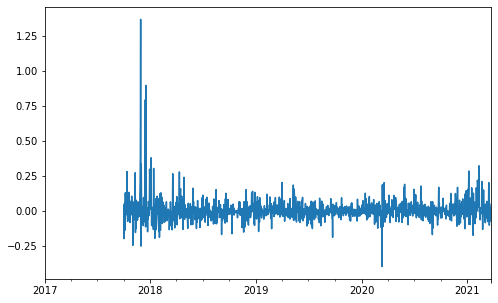


 --------------------------------------------- ^GSPC ---------------------------------------------


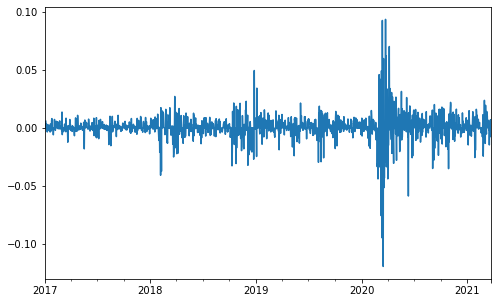

In [131]:
for ticker,df in tickers.items():
    print('\n','-'*45,ticker,'-'*45)
    df['simple_return'].plot(figsize = (8,5))
    plt.show()

In [132]:
print('Taxa Anual de Retorno Simples:\n')
for ticker,df in tickers.items():
    if ticker == '^GSPC':
        days = 250
    else:
        days = 365
    avg = str(round(df['simple_return'].mean()*days*100,2))+'%' #365 -> criptomoedas,  250 -> Ações
    print(ticker,'-',avg)#.rjust(15)

Taxa Anual de Retorno Simples:

BTC-USD - 126.4%
ETH-USD - 183.63%
BNB-USD - 314.66%
ADA-USD - 217.15%
^GSPC - 10.32%


In [133]:
for ticker,df in tickers.items():
    df['log_return'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
    print('\n','-'*45,ticker,'-'*45)
    print(df['log_return'])


 --------------------------------------------- BTC-USD ---------------------------------------------
2017-01-01         NaN
2017-01-02    0.023193
2017-01-03    0.021389
2017-01-04    0.100960
2017-01-05   -0.130575
                ...   
2021-03-21   -0.013644
2021-03-22   -0.053457
2021-03-23    0.003840
2021-03-24   -0.036552
2021-03-25   -0.020485
Freq: D, Name: log_return, Length: 1545, dtype: float64

 --------------------------------------------- ETH-USD ---------------------------------------------
2017-01-01         NaN
2017-01-02    0.024887
2017-01-03    0.149055
2017-01-04    0.145785
2017-01-05   -0.092803
                ...   
2021-03-21   -0.013562
2021-03-22   -0.055701
2021-03-23   -0.007528
2021-03-24   -0.052111
2021-03-25    0.001220
Freq: D, Name: log_return, Length: 1545, dtype: float64

 --------------------------------------------- BNB-USD ---------------------------------------------
2017-01-01         NaN
2017-01-02         NaN
2017-01-03         NaN
2017-01


 --------------------------------------------- BTC-USD ---------------------------------------------


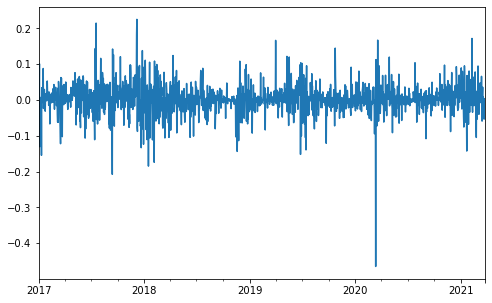


 --------------------------------------------- ETH-USD ---------------------------------------------


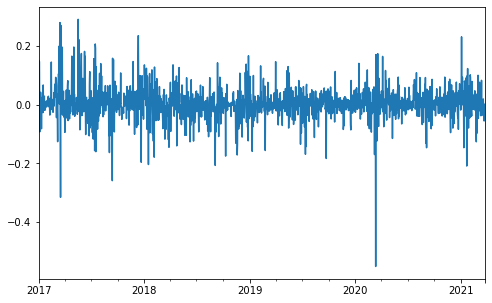


 --------------------------------------------- BNB-USD ---------------------------------------------


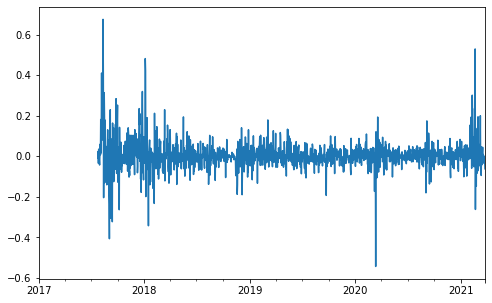


 --------------------------------------------- ADA-USD ---------------------------------------------


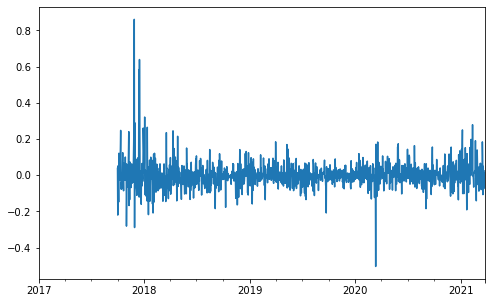


 --------------------------------------------- ^GSPC ---------------------------------------------


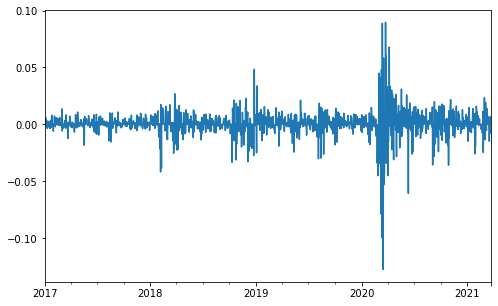

In [134]:
for ticker,df in tickers.items():
    print('\n','-'*45,ticker,'-'*45)
    df['log_return'].plot(figsize = (8,5))
    plt.show()

In [135]:
print('Taxa Anual de Retorno Logarítmico:\n')
for ticker,df in tickers.items():
    if ticker == '^GSPC':
        days = 250
    else:
        days = 365
    avg = str(round(df['log_return'].mean()*days*100,2))+'%' #365 -> criptomoedas,  250 -> Ações
    print(ticker,'-',avg)#.rjust(15)

Taxa Anual de Retorno Logarítmico:

BTC-USD - 93.31%
ETH-USD - 124.68%
BNB-USD - 209.87%
ADA-USD - 108.66%
^GSPC - 8.9%


In [136]:
print('Taxa Anual de Volatilidade:\n')
for ticker,df in tickers.items():
    if ticker == '^GSPC':
        days = 250
    else:
        days = 365
    std = str(round(((df['log_return'].std()*days)**0.5)*100,2))+'%' #365 -> criptomoedas,  250 -> Ações
    print(ticker,'-',std)#.rjust(15)

Taxa Anual de Volatilidade:

BTC-USD - 394.63%
ETH-USD - 455.28%
BNB-USD - 519.83%
ADA-USD - 521.64%
^GSPC - 163.29%


In [200]:
result = pd.DataFrame()
for ticker,df in tickers.items():
    result[ticker] = df.loc[df.index>=ini_date]['Adj Close']

In [201]:
result

,BTC-USD,ETH-USD,BNB-USD,ADA-USD,^GSPC
2017-09-30,4403.740234,302.337006,1.526530,0.024969,2519.360107
2017-10-01,4409.319824,297.475006,1.964670,0.025932,2519.360107
2017-10-02,4317.479980,292.463013,1.820700,0.020816,2529.120117
2017-10-03,4229.359863,292.657990,1.601480,0.021931,2534.580078
2017-10-04,4328.410156,295.863007,1.678490,0.021489,2537.739990
...,...,...,...,...,...
2021-03-21,57523.421875,1788.217041,264.886169,1.189140,3913.100098
2021-03-22,54529.144531,1691.333984,255.900192,1.109874,3940.590088
2021-03-23,54738.945312,1678.650146,255.689667,1.121552,3910.520020
2021-03-24,52774.265625,1593.413452,249.851379,1.075002,3889.139893


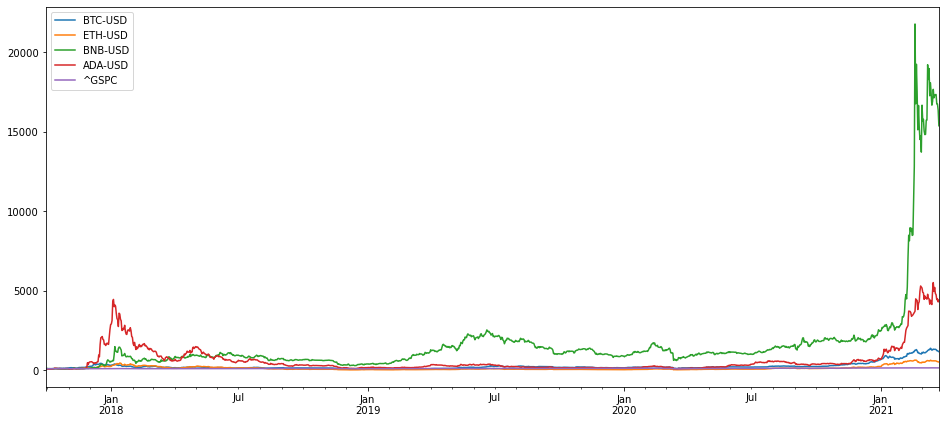

In [202]:
(result / result.iloc[0] * 100).plot(figsize = (16,7))
plt.show()

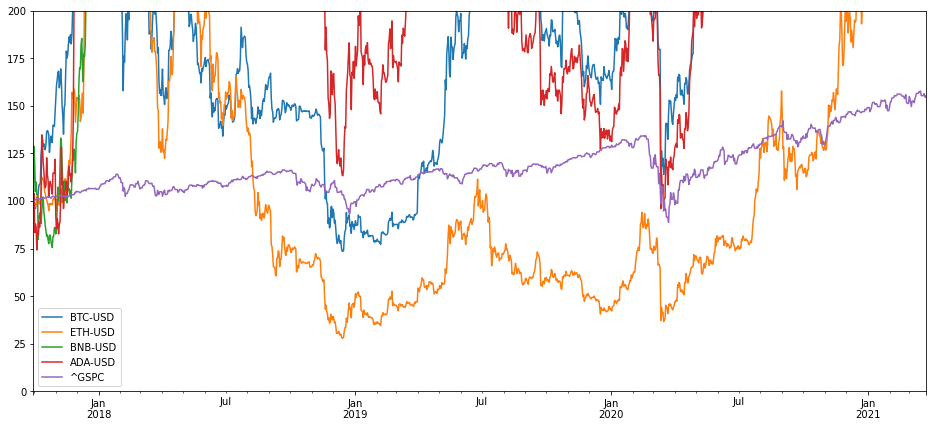

In [206]:
(result / result.iloc[0] * 100).plot(figsize = (16,7))
plt.ylim([0, 200])
plt.show()

In [210]:
result = pd.DataFrame()
for ticker,df in tickers.items():
    result[ticker] = df.loc[df.index>=ini_date]['log_return']

In [208]:
result.corr()

,BTC-USD,ETH-USD,BNB-USD,ADA-USD,^GSPC
BTC-USD,1.000000,0.753936,0.608321,0.557926,0.144258
ETH-USD,0.753936,1.000000,0.594145,0.648695,0.150398
BNB-USD,0.608321,0.594145,1.000000,0.478280,0.139845
ADA-USD,0.557926,0.648695,0.478280,1.000000,0.113643
^GSPC,0.144258,0.150398,0.139845,0.113643,1.000000


In [155]:
weights = np.array([0.60,0.25,0.10,0.03,0.02])

In [156]:
annual_return = result.mean()*365

In [157]:
weighted_annual_return = np.dot(annual_return,weights)
print(str(round(weighted_annual_return*100,2))+'%')

249585590.23%


In [158]:
portfolio_variance = np.dot(weights.T, np.dot(result.cov()*365, weights))
print(str(round(portfolio_variance*100,2))+'%')

1319425713375.64%


In [159]:
portfolio_volatility = (np.dot(weights.T, np.dot(result.cov()*365, weights))) ** 0.5
print(str(round(portfolio_volatility*100,2))+'%')

11486625.76%


In [160]:
diversifiable_risk = portfolio_variance
for i,ticker in enumerate(result.columns):
    diversifiable_risk -= weights[i] ** 2 * (result[ticker].var()*365)
print(str(round(diversifiable_risk*100,2))+'%')

39032565585.5%


In [161]:
non_diversifiable_risk = 0
for i,ticker in enumerate(result.columns):
    non_diversifiable_risk += weights[i] ** 2 * (result[ticker].var()*365)
print(str(round(non_diversifiable_risk*100,2))+'%')

1280393147790.13%


In [162]:
test = result[['ETH-USD','BNB-USD']].copy()
test

,ETH-USD,BNB-USD
2017-09-30,302.337006,1.526530
2017-10-01,297.475006,1.964670
2017-10-02,292.463013,1.820700
2017-10-03,292.657990,1.601480
2017-10-04,295.863007,1.678490
...,...,...
2021-03-21,1788.217041,264.886169
2021-03-22,1691.333984,255.900192
2021-03-23,1678.650146,255.689667
2021-03-24,1593.413452,249.851379


In [163]:
weights = np.random.random(len(test.columns))
weights /= np.sum(weights)
print(weights)
print(sum(weights))

[0.47216976 0.52783024]
1.0


In [164]:
expected_portfolio_return = np.sum(weights * test.mean())*365
expected_portfolio_return

75686.63229292392

In [165]:
expected_portfolio_variance = np.dot(weights.T, np.dot(test.cov()*365, weights))
expected_portfolio_variance

13658105.77215802

In [166]:
expected_portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(test.cov()*365, weights)))
expected_portfolio_volatility

3695.687455962425

In [191]:
def generate_portfolio(df,columns):
    expected_portfolio_return_list = []
    expected_portfolio_volatility_list = []
    
    for i in range(1000):
        weights = np.random.random(len(df[columns].columns))
        weights /= np.sum(weights)
        if ticker == '^GSPC':
            days = 250
        else:
            days = 365
        expected_portfolio_return_list += [np.sum(weights * df[columns].mean())*days]
        expected_portfolio_volatility_list += [np.sqrt(np.dot(weights.T, np.dot(df[columns].cov()*days, weights)))]
    
    portfolios = pd.DataFrame({'Return': np.array(expected_portfolio_return_list),
                               'Volatility': np.array(expected_portfolio_volatility_list)})
    return portfolios

Text(0, 0.5, 'Expected Return')

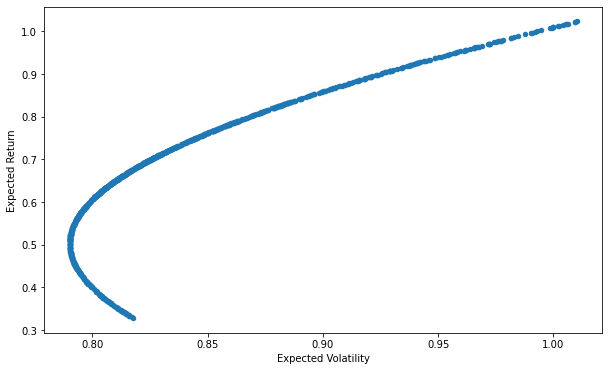

In [197]:
portfolios = generate_portfolio(result,['ETH-USD','BNB-USD'])
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [244]:
financial_analysis = {}
financial_analysis['Beta'] = {}

covariance_GSPC = (result.cov() * 365).loc['^GSPC']
for i,v in zip(covariance_GSPC.index,covariance_GSPC.values):
    if i!='^GSPC':
        beta = v / (result['^GSPC'].var() * 250)
        print('Beta',i,'=',beta)
        financial_analysis['Beta'].update({i:beta})

Beta BTC-USD = 0.7604253387328834
Beta ETH-USD = 0.9780013163727915
Beta BNB-USD = 1.1229089174611948
Beta ADA-USD = 1.0652303887584662


In [246]:
financial_analysis['CAPM'] = {}
for i,v in financial_analysis['Beta'].items():
    CAPM = (2.5/100)+v*(5/100)
    print('CAPM',i,'=',CAPM)
    financial_analysis['CAPM'].update({i:CAPM})

CAPM BTC-USD = 0.06302126693664417
CAPM ETH-USD = 0.07390006581863959
CAPM BNB-USD = 0.08114544587305975
CAPM ADA-USD = 0.07826151943792331


In [247]:
financial_analysis['Sharpe'] = {}
for i,v in financial_analysis['CAPM'].items():
    sharpe = (v-(2.5/100)) / (result[i].std() * 365 ** 0.5)
    print('Sharpe',i,'=',sharpe)
    financial_analysis['Sharpe'].update({i:sharpe})

Sharpe BTC-USD = 0.047450701545127094
Sharpe ETH-USD = 0.049470435979468166
Sharpe BNB-USD = 0.04599910987210119
Sharpe ADA-USD = 0.037395091741579546


In [281]:
result = pd.DataFrame()
result['BTC-USD'] = tickers['BTC-USD']['Adj Close']

In [282]:
log_returns = np.log(1+result.pct_change())

In [283]:
drift = log_returns.mean() - (0.5 * log_returns.var())
drift

BTC-USD    0.001702
dtype: float64

In [284]:
stdev = log_returns.std()
stdev

BTC-USD    0.042643
dtype: float64

In [285]:
norm.ppf(0.95)

1.6448536269514722

In [286]:
x = np.random.rand(10,2)
x

array([[0.95346774, 0.86644148],
       [0.62513345, 0.73653578],
       [0.76173069, 0.65364382],
       [0.2006295 , 0.44966582],
       [0.02563043, 0.3569424 ],
       [0.00407388, 0.53753578],
       [0.06466818, 0.31173506],
       [0.3284411 , 0.37145283],
       [0.48176621, 0.09721049],
       [0.68437232, 0.69614386]])

In [287]:
Z = norm.ppf(x)
Z

array([[ 1.67944924,  1.10972616],
       [ 0.31899131,  0.63270174],
       [ 0.71188077,  0.39517688],
       [-0.83937484, -0.12650569],
       [-1.9492895 , -0.3666437 ],
       [-2.64588455,  0.09422751],
       [-1.51672413, -0.49093824],
       [-0.44422184, -0.32800794],
       [-0.04572125, -1.29761119],
       [ 0.47996066,  0.51334174]])

In [289]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[1.02750988, 0.95094725, 1.04607346, ..., 0.98970589, 1.04813121,
        0.96977166],
       [1.01740338, 1.02942137, 1.04478223, ..., 1.05465728, 0.9313371 ,
        0.98150298],
       [1.07612172, 1.0288469 , 1.03557139, ..., 1.03983323, 1.01290721,
        1.02741926],
       ...,
       [1.01110853, 0.89103384, 1.07368922, ..., 1.02194647, 0.9814669 ,
        1.00146901],
       [0.92417742, 0.99635229, 1.01271207, ..., 1.00916273, 1.04067877,
        0.95601265],
       [0.99819092, 0.94099926, 1.03313652, ..., 1.00925337, 0.99063687,
        0.96260442]])

In [290]:
S0 = result.iloc[-1]
S0

BTC-USD    56850.472656
Name: 2021-03-29 00:00:00, dtype: float64

In [291]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [292]:
price_list[0] = S0
price_list

array([[56850.47265625, 56850.47265625, 56850.47265625, ...,
        56850.47265625, 56850.47265625, 56850.47265625],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ]])

In [293]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [294]:
price_list

array([[ 56850.47265625,  56850.47265625,  56850.47265625, ...,
         56850.47265625,  56850.47265625,  56850.47265625],
       [ 57839.86305253,  58523.09152848,  59396.36376147, ...,
         59957.7649055 ,  52946.95439521,  55798.90834204],
       [ 62242.73262723,  60211.30123772,  61509.17482625, ...,
         62346.07605015,  53630.35178465,  57328.87287241],
       ...,
       [ 41000.45012897, 106782.43143727, 267979.77323919, ...,
        784606.50329537, 916461.16332117, 378115.31992081],
       [ 37891.69012144, 106392.92053567, 271386.35102642, ...,
        791795.64230046, 953741.67590745, 361483.02901867],
       [ 37823.14117359, 100115.65899275, 280379.14954376, ...,
        799122.41738747, 944811.66678821, 347965.16152972]])

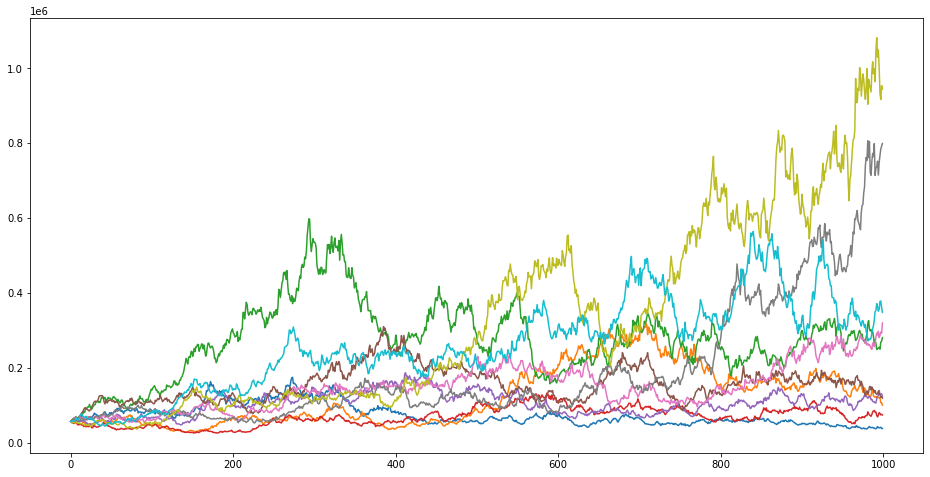

In [298]:
plt.figure(figsize=(16,8))
plt.plot(price_list);

In [310]:
r = 0.025

In [311]:
stdev = (log_returns.std()*365 **0.5).values
stdev

array([0.81470039])

In [324]:
T = 1.0
t_intervals = 365
delta_t = T/t_intervals

iterations = 10000

In [325]:
Z = np.random.standard_normal((t_intervals+1,iterations))
S = np.zeros_like(Z)
S0 = result.iloc[-1]
S[0] = S0

In [326]:
for t in range(1, t_intervals+1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [327]:
S

array([[ 56850.47265625,  56850.47265625,  56850.47265625, ...,
         56850.47265625,  56850.47265625,  56850.47265625],
       [ 55761.01375602,  59210.37803027,  55621.9708513 , ...,
         52858.38977543,  59165.46722573,  59200.7059871 ],
       [ 52106.9620987 ,  63367.59954669,  50361.74187741, ...,
         53056.12446839,  58560.88563939,  63768.010313  ],
       ...,
       [ 34569.21815838, 159026.05629708,  12006.4149658 , ...,
         97374.86353398,  63446.96536906,  24303.38518627],
       [ 34942.37906386, 167017.31117177,  11955.41972331, ...,
         97773.11493539,  66123.63061409,  24887.172709  ],
       [ 35049.88214718, 171198.96152005,  11637.97133978, ...,
         99919.88852612,  64338.34510125,  25914.54159031]])

In [328]:
S.shape

(366, 10000)

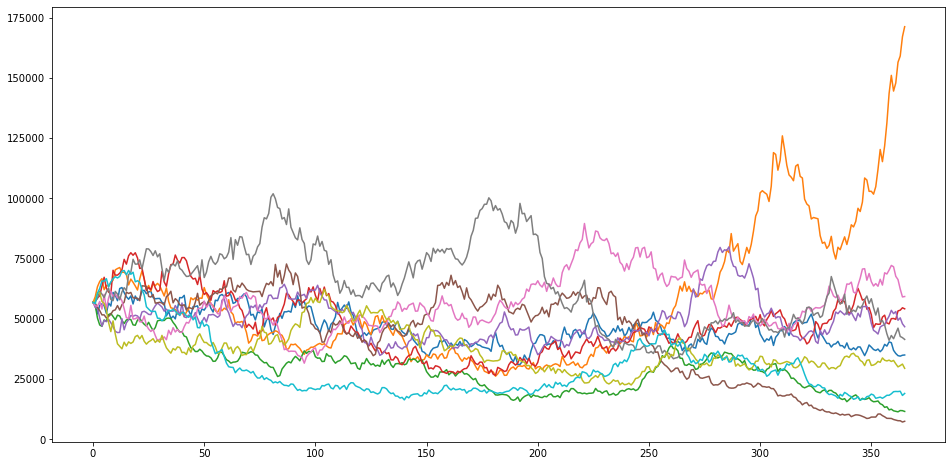

In [332]:
plt.figure(figsize=(16,8))
plt.plot(S[:, :10]);

In [333]:
p = np.maximum(S[-1] - 110,0)

In [ ]:
C = np.exp(-r * T) * np.sum(p) / itarions
C